# **Coursera Data Science Capstone**

## **Battle of the Neighborhoods** - Week 4 & 5 Final Project

### Brandon Tuinstra
### 3/17/2021

## **Table of Contents**
1. [Introduction of the Problem](#Introduction_of_the_Problem)
2. [Data](#Data)
3. [Methodology](#Methodology)
4. [Results](#Results)
5. [Discussion](#Discussion)
6. [Conclusion](#Conclusion)

**Introduction of the Problem**<a id='Introduction_of_the_Problem'></a>

In this final capstone project we will be looking at moving a BBQ restaurant to the city of Miami, FL.

We will want this to be near the city but see how the competitive market around Miami looks like for bbq restaurants.  We want there to be not as much competition in order to grow.  

We will be pulling in data from Miami, FL for bbq restaurants.  We will identify their locations, get the total number of restaurants, map them and see what opportunities lie in opening in Miami.

In [1]:
import numpy as np 
import pandas as pd 
import random
import json
import os
from geopy.geocoders import Nominatim 
import geopy.distance
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
#import folium
#pip install folium
#conda install -c conda-forge folium
import re
from matplotlib import pyplot as plt
from botocore.client import Config
import ibm_boto3
!pip install folium
from functools import reduce

print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 6.0 MB/s  eta 0:00:01
Libraries imported.


**Data**<a id='Data'></a>

First we will need to get the data of the list of neighborhooods in Miami that we are extracting from Wikipedia.

In [2]:
miami_zip = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami')
miami_zip

[                     Neighborhood          Demonym            Population2010  \
 0                      Allapattah              NaN                     54289   
 1   Arts & Entertainment District              NaN                     11033   
 2                        Brickell      Brickellite                     31759   
 3                     Buena Vista              NaN                      9058   
 4                   Coconut Grove          Grovite                     20076   
 5                       Coral Way              NaN                     35062   
 6                 Design District              NaN                      3573   
 7                        Downtown       Downtowner  71,000 (13,635 CBD only)   
 8                       Edgewater              NaN                     15005   
 9                         Flagami              NaN                     50834   
 10              Grapeland Heights              NaN                     14004   
 11                Health Di

Second we will be converting this data into a usable dataframe.

In [3]:
miami_df = miami_zip[0]
miami_df

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates
0,Allapattah,NaN,54289,4401,NaN,".mw-parser-output .geo-default,.mw-parser-outp..."
1,Arts & Entertainment District,NaN,11033,7948,NaN,25°47′56″N 80°11′24″W﻿ / ﻿25.799°N 80.190°W
2,Brickell,Brickellite,31759,14541,West Brickell,25°45′29″N 80°11′35″W﻿ / ﻿25.758°N 80.193°W
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25°48′47″N 80°11′31″W﻿ / ﻿25.813°N 80.192°W
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25°42′43″N 80°15′25″W﻿ / ﻿25.712°N 80.257°W
5,Coral Way,NaN,35062,4496,"Coral Gate, Golden Pines, Shenandoah, Historic...",25°45′00″N 80°16′59″W﻿ / ﻿25.750°N 80.283°W
6,Design District,NaN,3573,3623,NaN,25°48′47″N 80°11′35″W﻿ / ﻿25.813°N 80.193°W
7,Downtown,Downtowner,"71,000 (13,635 CBD only)",10613,"Brickell, Central Business District (CBD), Dow...",25°46′26″N 80°11′35″W﻿ / ﻿25.774°N 80.193°W
8,Edgewater,NaN,15005,6675,NaN,25°48′07″N 80°11′24″W﻿ / ﻿25.802°N 80.190°W
9,Flagami,NaN,50834,5665,"Alameda, Grapeland Heights, and Fairlawn",25°45′43″N 80°18′58″W﻿ / ﻿25.762°N 80.316°W


As you can see with the raw data there are missing values and some NaN's that will need to be cleaned up in order to use the data for manipulation and analysis.  Now lets see how big the dataset is by looking at the shape.

In [4]:
miami_df.shape

(26, 6)

We will remove unnecessary columns using the drop method.

In [5]:
miami_df = miami_df.drop(columns =['Demonym','Sub-neighborhoods'], index = [0])
miami_df

,Neighborhood,Population2010,Population/Km²,Coordinates
1,Arts & Entertainment District,11033,7948,25°47′56″N 80°11′24″W﻿ / ﻿25.799°N 80.190°W
2,Brickell,31759,14541,25°45′29″N 80°11′35″W﻿ / ﻿25.758°N 80.193°W
3,Buena Vista,9058,3540,25°48′47″N 80°11′31″W﻿ / ﻿25.813°N 80.192°W
4,Coconut Grove,20076,3091,25°42′43″N 80°15′25″W﻿ / ﻿25.712°N 80.257°W
5,Coral Way,35062,4496,25°45′00″N 80°16′59″W﻿ / ﻿25.750°N 80.283°W
6,Design District,3573,3623,25°48′47″N 80°11′35″W﻿ / ﻿25.813°N 80.193°W
7,Downtown,"71,000 (13,635 CBD only)",10613,25°46′26″N 80°11′35″W﻿ / ﻿25.774°N 80.193°W
8,Edgewater,15005,6675,25°48′07″N 80°11′24″W﻿ / ﻿25.802°N 80.190°W
9,Flagami,50834,5665,25°45′43″N 80°18′58″W﻿ / ﻿25.762°N 80.316°W
10,Grapeland Heights,14004,4130,25°47′31″N 80°15′29″W﻿ / ﻿25.792°N 80.258°W


Next step will be replacing the dashes and then dropping any fields with NaN's.

In [6]:
miami_df = miami_df.replace("-", np.nan)
miami_df = miami_df.dropna()
miami_df

,Neighborhood,Population2010,Population/Km²,Coordinates
1,Arts & Entertainment District,11033,7948,25°47′56″N 80°11′24″W﻿ / ﻿25.799°N 80.190°W
2,Brickell,31759,14541,25°45′29″N 80°11′35″W﻿ / ﻿25.758°N 80.193°W
3,Buena Vista,9058,3540,25°48′47″N 80°11′31″W﻿ / ﻿25.813°N 80.192°W
4,Coconut Grove,20076,3091,25°42′43″N 80°15′25″W﻿ / ﻿25.712°N 80.257°W
5,Coral Way,35062,4496,25°45′00″N 80°16′59″W﻿ / ﻿25.750°N 80.283°W
6,Design District,3573,3623,25°48′47″N 80°11′35″W﻿ / ﻿25.813°N 80.193°W
7,Downtown,"71,000 (13,635 CBD only)",10613,25°46′26″N 80°11′35″W﻿ / ﻿25.774°N 80.193°W
8,Edgewater,15005,6675,25°48′07″N 80°11′24″W﻿ / ﻿25.802°N 80.190°W
9,Flagami,50834,5665,25°45′43″N 80°18′58″W﻿ / ﻿25.762°N 80.316°W
10,Grapeland Heights,14004,4130,25°47′31″N 80°15′29″W﻿ / ﻿25.792°N 80.258°W


As you can clearly see one of the population values still contains other information that is not needed when all that is needed is a numerical value.  We will need to replace that cell with just the value provided using the replace function.

In [7]:
miami_df['Population2010'] = miami_df['Population2010'].replace(['71,000 (13,635 CBD only)'],'71000')
miami_df

,Neighborhood,Population2010,Population/Km²,Coordinates
1,Arts & Entertainment District,11033,7948,25°47′56″N 80°11′24″W﻿ / ﻿25.799°N 80.190°W
2,Brickell,31759,14541,25°45′29″N 80°11′35″W﻿ / ﻿25.758°N 80.193°W
3,Buena Vista,9058,3540,25°48′47″N 80°11′31″W﻿ / ﻿25.813°N 80.192°W
4,Coconut Grove,20076,3091,25°42′43″N 80°15′25″W﻿ / ﻿25.712°N 80.257°W
5,Coral Way,35062,4496,25°45′00″N 80°16′59″W﻿ / ﻿25.750°N 80.283°W
6,Design District,3573,3623,25°48′47″N 80°11′35″W﻿ / ﻿25.813°N 80.193°W
7,Downtown,71000,10613,25°46′26″N 80°11′35″W﻿ / ﻿25.774°N 80.193°W
8,Edgewater,15005,6675,25°48′07″N 80°11′24″W﻿ / ﻿25.802°N 80.190°W
9,Flagami,50834,5665,25°45′43″N 80°18′58″W﻿ / ﻿25.762°N 80.316°W
10,Grapeland Heights,14004,4130,25°47′31″N 80°15′29″W﻿ / ﻿25.792°N 80.258°W


There is still an issue with the remaining data.  There are two values given for the latitude and longitude values for each neighborhood.  We will need to drop one of the set of values.

In [8]:
miami_df2 = miami_df.Coordinates.str.split('/', expand=True)
miami_df = miami_df.join(miami_df2)
miami_df.rename(columns={0:'trash',1:'latlong'},inplace=True)
miami_df = miami_df.drop(columns =['Coordinates','trash'])
miami_df

,Neighborhood,Population2010,Population/Km²,latlong
1,Arts & Entertainment District,11033,7948,﻿25.799°N 80.190°W
2,Brickell,31759,14541,﻿25.758°N 80.193°W
3,Buena Vista,9058,3540,﻿25.813°N 80.192°W
4,Coconut Grove,20076,3091,﻿25.712°N 80.257°W
5,Coral Way,35062,4496,﻿25.750°N 80.283°W
6,Design District,3573,3623,﻿25.813°N 80.193°W
7,Downtown,71000,10613,﻿25.774°N 80.193°W
8,Edgewater,15005,6675,﻿25.802°N 80.190°W
9,Flagami,50834,5665,﻿25.762°N 80.316°W
10,Grapeland Heights,14004,4130,﻿25.792°N 80.258°W


We now dropped one of the values but we need to split the coordinates into two columns.

In [9]:
miami_df3 = miami_df.latlong.str.split(' ', expand=True)
miami_df = miami_df.join(miami_df3)
miami_df.rename(columns={0:'trash',1:'Latitude',2:"Longitude"},inplace=True)
miami_df = miami_df.drop(columns =['latlong','trash'])
miami_df

,Neighborhood,Population2010,Population/Km²,Latitude,Longitude
1,Arts & Entertainment District,11033,7948,﻿25.799°N,80.190°W
2,Brickell,31759,14541,﻿25.758°N,80.193°W
3,Buena Vista,9058,3540,﻿25.813°N,80.192°W
4,Coconut Grove,20076,3091,﻿25.712°N,80.257°W
5,Coral Way,35062,4496,﻿25.750°N,80.283°W
6,Design District,3573,3623,﻿25.813°N,80.193°W
7,Downtown,71000,10613,﻿25.774°N,80.193°W
8,Edgewater,15005,6675,﻿25.802°N,80.190°W
9,Flagami,50834,5665,﻿25.762°N,80.316°W
10,Grapeland Heights,14004,4130,﻿25.792°N,80.258°W


Let's sort this data now by the "Population/Km²" column to see where the densely populated areas are that would be one of the factors in looking for a place to start a bbq restaurant.

In [10]:
miami_df = miami_df.sort_values(by="Population/Km²", ascending=False)
miami_df

,Neighborhood,Population2010,Population/Km²,Latitude,Longitude
14,Little Havana,76163,8423,﻿25.773°N,80.215°W
1,Arts & Entertainment District,11033,7948,﻿25.799°N,80.190°W
8,Edgewater,15005,6675,﻿25.802°N,80.190°W
9,Flagami,50834,5665,﻿25.762°N,80.316°W
19,The Roads,7327,4899,﻿25.756°N,80.207°W
5,Coral Way,35062,4496,﻿25.750°N,80.283°W
23,West Flagler,31407,4428,﻿25.775°N,80.243°W
10,Grapeland Heights,14004,4130,﻿25.792°N,80.258°W
13,Little Haiti,29760,3840,﻿25.824°N,80.191°W
12,Liberty City,19725,3733,﻿25.832°N,80.225°W


We need to convert the coordinate columns into numerical values for mapping purposes.

In [11]:
miami_df['Latitude'] = miami_df['Latitude'].str.replace(r'\D', "").astype(int)/1000
miami_df['Longitude'] = miami_df['Longitude'].str.replace(r'\D', "").astype(int)/(-1000)
miami_df

,Neighborhood,Population2010,Population/Km²,Latitude,Longitude
14,Little Havana,76163,8423,25.773,-80.215
1,Arts & Entertainment District,11033,7948,25.799,-80.190
8,Edgewater,15005,6675,25.802,-80.190
9,Flagami,50834,5665,25.762,-80.316
19,The Roads,7327,4899,25.756,-80.207
5,Coral Way,35062,4496,25.750,-80.283
23,West Flagler,31407,4428,25.775,-80.243
10,Grapeland Heights,14004,4130,25.792,-80.258
13,Little Haiti,29760,3840,25.824,-80.191
12,Liberty City,19725,3733,25.832,-80.225


Let's find the center of the Miami neighborhoods.

In [12]:
latitude = miami_df['Latitude'].mean(axis=0)
longitude = miami_df['Longitude'].mean(axis=0)
print('Center of the Miami:')
print('Latitude =',latitude)
print('Longitude =',longitude)

Center of the Miami:
Latitude = 25.785899999999998
Longitude = -80.21615


Lastly lets map the neighborhoods given the coordinates from the list.

In [13]:
import folium

In [14]:
map_mia = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, neighborhood in zip(miami_df['Latitude'], miami_df['Longitude'], miami_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mia)  
    
map_mia

In our next piece of data that we will be working to get is a list of nearby bbq restaurants to get an idea of the amount of competition.  Utlizing Foursquare we can extract that information.  First we will need to connect to Foursquare.

In [15]:
CLIENT_ID = 'N3BO2J150QI14EMLRU43NQR2PTNYUQXIODI1CYV1CPJWJZ42' # your Foursquare ID
CLIENT_SECRET = 'KPRQKWX33NQS3J4PIY4QR0K1TY2TTXNGAHF2RUPCP04CY0C2' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
food_category = '4bf58dd8d48988d1df931735' #bbq code for foursquare venues

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
                   

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            food_category,
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
print('bbq restaurants!')

bbq restaurants!


Then extract the list of nearby bbq restaurants.

In [17]:
bbqmiami = getNearbyVenues(names=miami_df['Neighborhood'], latitudes=miami_df['Latitude'], longitudes=miami_df['Longitude'])
bbqmiami

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Little Havana,25.773,-80.215,Brother Jimmy's BBQ,25.778046,-80.220604,BBQ Joint
1,Little Havana,25.773,-80.215,passion bbq,25.778049,-80.222298,Food Truck
2,Little Havana,25.773,-80.215,McDonald's,25.773378,-80.211783,Fast Food Restaurant
3,Arts & Entertainment District,25.799,-80.190,Plant Food + Wine Miami,25.800452,-80.192805,Restaurant
4,Arts & Entertainment District,25.799,-80.190,KUSH Wynwood,25.795751,-80.194720,Beer Garden
5,Arts & Entertainment District,25.799,-80.190,Wynwood Kitchen & Bar,25.801216,-80.199364,American Restaurant
6,Arts & Entertainment District,25.799,-80.190,The Butcher Shop,25.799301,-80.198125,Beer Garden
7,Arts & Entertainment District,25.799,-80.190,Wayla BBQ,25.799311,-80.197985,Asian Restaurant
8,Edgewater,25.802,-80.190,Plant Food + Wine Miami,25.800452,-80.192805,Restaurant
9,Edgewater,25.802,-80.190,KUSH Wynwood,25.795751,-80.194720,Beer Garden


Again, let's check the size and shape of the data.

In [18]:
bbqmiami.shape

(60, 7)

Add the column with name of the venue.

In [19]:
bbqmiami_dist = pd.DataFrame()

bbqmiami_dist['Venue'] = bbqmiami['Venue']

Let's get the distance of each venue to the neighborhood.

In [20]:
for lat, lng, neighborhood in zip(miami_df['Latitude'], miami_df['Longitude'], miami_df['Neighborhood']):
    coords_1 = (lat, lng)
    for i, row in bbqmiami.iterrows():
        coords_2 = (row['Venue Latitude'], row['Venue Longitude'])

        bbqmiami_dist.loc[i,neighborhood] = geopy.distance.distance(coords_1, coords_2).miles
bbqmiami_dist

,Venue,Little Havana,Arts & Entertainment District,Edgewater,Flagami,The Roads,Coral Way,West Flagler,Grapeland Heights,Little Haiti,...,Lummus Park,Park West,Design District,Buena Vista,Overtown,Coconut Grove,Wynwood,Upper Eastside,Brickell,Downtown
0,Brother Jimmy's BBQ,0.492585,2.391318,2.521258,6.047843,1.738422,4.342197,1.411547,2.520835,3.662027,...,1.223973,1.785777,2.957862,2.994534,1.368487,5.081234,2.237146,4.275719,2.205592,1.742886
1,passion bbq,0.572451,2.476227,2.601912,5.944089,1.792482,4.247959,1.307252,2.423466,3.716151,...,1.329409,1.887661,3.020318,3.058392,1.463443,5.035143,2.302069,4.334302,2.289053,1.847233
2,McDonald's,0.202205,2.225707,2.392667,6.543124,1.232895,4.722039,1.948921,3.152805,3.717594,...,0.716826,1.417909,2.968048,2.993173,1.153646,5.079295,2.253451,4.290613,1.578437,1.171500
3,Plant Food + Wine Miami,2.341889,0.201367,0.204733,8.121568,3.185323,6.607956,3.585455,4.104200,1.624919,...,1.693246,1.063754,0.863880,0.865251,1.057491,7.286184,0.456799,2.123823,2.922344,1.820948
4,KUSH Wynwood,2.012565,0.369477,0.521085,7.907966,2.841443,6.340040,3.330840,3.951983,1.958368,...,1.348846,0.747818,1.192205,1.199412,0.718404,6.950713,0.627360,2.468136,2.600943,1.501153
5,Wynwood Kitchen & Bar,2.173072,0.603150,0.586024,7.754375,3.148766,6.293149,3.263765,3.708663,1.652745,...,1.670105,1.184650,0.902944,0.931994,0.983901,7.115223,0.192988,2.228402,3.001246,1.915032
6,The Butcher Shop,2.093836,0.506735,0.539308,7.782417,3.031689,6.285187,3.258840,3.764965,1.757223,...,1.545616,1.034998,0.995598,1.017298,0.865558,7.041754,0.328008,2.313859,2.861009,1.770753
7,Wayla BBQ,2.098799,0.498051,0.530900,7.790868,3.033941,6.292885,3.266665,3.773695,1.754401,...,1.547306,1.032970,0.992208,1.013446,0.868049,7.046867,0.328923,2.309718,2.860704,1.769851
8,Plant Food + Wine Miami,2.341889,0.201367,0.204733,8.121568,3.185323,6.607956,3.585455,4.104200,1.624919,...,1.693246,1.063754,0.863880,0.865251,1.057491,7.286184,0.456799,2.123823,2.922344,1.820948
9,KUSH Wynwood,2.012565,0.369477,0.521085,7.907966,2.841443,6.340040,3.330840,3.951983,1.958368,...,1.348846,0.747818,1.192205,1.199412,0.718404,6.950713,0.627360,2.468136,2.600943,1.501153


We will transpose the information so we can have the neighborhoods become the rows to see the distance from each neighborhood to each of the venues.

In [21]:
bbqmiami_dist = bbqmiami_dist.set_index('Venue').T
bbqmiami_dist['Mean_Dist'] = bbqmiami_dist.mean(axis=1)
bbqmiami_dist

Venue,Brother Jimmy's BBQ,passion bbq,McDonald's,Plant Food + Wine Miami,KUSH Wynwood,Wynwood Kitchen & Bar,The Butcher Shop,Wayla BBQ,Plant Food + Wine Miami,KUSH Wynwood,...,Bubba Gump Shrimp Co.,Tuyo Restaurant,Hooters,Miami Barbecue,Miami Style BBQ,Pizza Rustica,Steak Brasil Churrascaria,Mikey's Café,Mamma Caruso's Pizzeria,Mean_Dist
Little Havana,0.492585,0.572451,0.202205,2.341889,2.012565,2.173072,2.093836,2.098799,2.341889,2.012565,...,1.770096,1.578016,1.817639,1.716076,1.656141,1.545413,1.431491,1.315736,1.392165,2.300858
Arts & Entertainment District,2.391318,2.476227,2.225707,0.201367,0.369477,0.603150,0.506735,0.498051,0.201367,0.369477,...,1.430253,1.408568,1.429803,1.411581,2.166869,2.140204,1.805868,2.202628,2.262720,1.521021
Edgewater,2.521258,2.601912,2.392667,0.204733,0.521085,0.586024,0.539308,0.530900,0.204733,0.521085,...,1.635447,1.615050,1.634170,1.617502,2.373325,2.346662,2.011926,2.407356,2.468131,1.546385
Flagami,6.047843,5.944089,6.543124,8.121568,7.907966,7.754375,7.782417,7.790868,8.121568,7.907966,...,8.105249,7.909089,8.152884,8.049450,7.917740,7.811706,7.762957,7.560574,7.615678,7.816427
The Roads,1.738422,1.792482,1.232895,3.185323,2.841443,3.148766,3.031689,3.033941,3.185323,2.841443,...,1.972657,1.863943,2.007815,1.947085,1.368119,1.298750,1.487513,1.085970,1.081612,2.846807
Coral Way,4.342197,4.247959,4.722039,6.607956,6.340040,6.293149,6.285187,6.292885,6.607956,6.340040,...,6.281294,6.095402,6.328259,6.230071,5.975020,5.875304,5.884168,5.622661,5.665650,6.213412
West Flagler,1.411547,1.307252,1.948921,3.585455,3.330840,3.263765,3.258840,3.266665,3.585455,3.330840,...,3.483899,3.285422,3.531382,3.426754,3.397157,3.286889,3.180146,3.047605,3.117098,3.514458
Grapeland Heights,2.520835,2.423466,3.152805,4.104200,3.951983,3.708663,3.764965,3.773695,4.104200,3.951983,...,4.509357,4.311680,4.554020,4.449785,4.611297,4.501534,4.317849,4.287310,4.367668,4.176288
Little Haiti,3.662027,3.716151,3.717594,1.624919,1.958368,1.652745,1.757223,1.754401,1.624919,1.958368,...,3.149531,3.129476,3.146439,3.132886,3.888906,3.860527,3.522969,3.910125,3.974635,2.408049
Liberty City,3.724230,3.717747,4.118611,2.956390,3.128304,2.653675,2.805468,2.810152,2.956390,3.128304,...,4.377979,4.264015,4.397630,4.336074,4.969138,4.897725,4.561789,4.833569,4.918609,3.545023


We want to see the the amount of restaurants in a given neighborhood to see how much competition there is in each neighborhood.

In [22]:
bbqmiami_rest= bbqmiami[['Venue','Neighborhood']].groupby('Neighborhood').count()
bbqmiami_rest.rename(columns={'Venue': 'Num_of_Restaurants'}, inplace=True)
bbqmiami_rest.sort_values(by="Num_of_Restaurants")

,Num_of_Restaurants
Neighborhood,
Coral Way,2
Upper Eastside,2
Little Havana,3
Buena Vista,4
Design District,4
Park West,4
Arts & Entertainment District,5
Little Haiti,5
Brickell,6


In order to see what kind of extra income neighborhoods have for excess spending we need to get the average income for each neighborhood.

In [23]:
def __iter__(self): return 0

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_e286354c38d84e4f97828e9264c8918c = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_e286354c38d84e4f97828e9264c8918c = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_e286354c38d84e4f97828e9264c8918c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PfChvxSSOaVxpfOYvWFCceMSQecgrwz4ONNzGjVQxh2T',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_e286354c38d84e4f97828e9264c8918c)

body = client_e286354c38d84e4f97828e9264c8918c.get_object(Bucket='bcourseracapstone-donotdelete-pr-si3pghsofgjopa',Key='income_indicator_data_download_20210321.csv')['Body']

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

miami_dollars = pd.read_csv(body)
miami_dollars.head()

,Indicator Name,What Is This Indicator,Location Type,Location,Indicator Rate Value,Indicator Rate Value Units,Rate Lower Confidence Interval,Rate Upper Confidence Interval,Indicator Count Value,Indicator Count Value Units,...,Breakout Rate Value,Breakout Rate Value Units,Breakout Rate Lower Confidence Interval,Breakout Rate Upper Confidence Interval,Breakout Count Value,Breakout Count Value Units,Breakout Count Lower Confidence Interval,Breakout Count Upper Confidence Interval,Breakout Unstable,Breakout Footer
0,Median Household Income,This indicator shows the median household inco...,Zip Code,33010,30000,dollars,27708,32292,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Median Household Income,This indicator shows the median household inco...,Zip Code,33012,31320,dollars,29772,32868,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Median Household Income,This indicator shows the median household inco...,Zip Code,33013,36280,dollars,33702,38858,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Median Household Income,This indicator shows the median household inco...,Zip Code,33014,42700,dollars,39776,45624,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Median Household Income,This indicator shows the median household inco...,Zip Code,33015,53046,dollars,50794,55298,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets sort the information by the highest average.

In [24]:
miami_income = miami_dollars[["Location","Indicator Rate Value","Rate Lower Confidence Interval","Rate Upper Confidence Interval"]]
miami_income.sort_values(by="Indicator Rate Value", ascending=False)

,Location,Indicator Rate Value,Rate Lower Confidence Interval,Rate Upper Confidence Interval
17,33109,200577,37329,363825
48,33158,170673,151080,190266
42,33149,151190,131696,170684
77,33194,118125,112069,124181
40,33146,117500,91534,143466
...,...,...,...,...
19,33125,27544,25422,29666
14,33054,26919,23807,30031
36,33142,26424,24671,28177
30,33136,26336,23783,28889


**Methodology**<a id='Methodology'></a>

Now we will find the correct amount of clusters to analyze using kmeans.

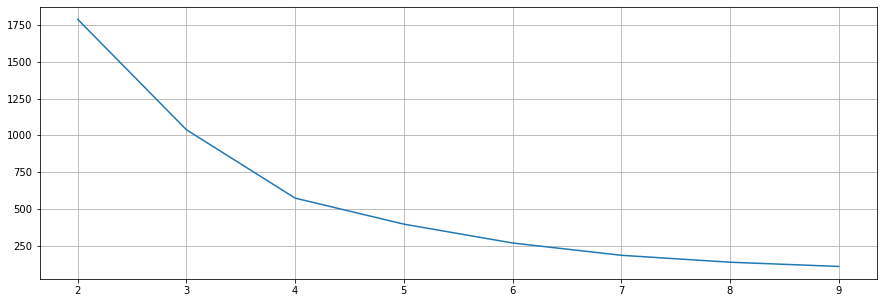

In [25]:
X = bbqmiami_dist
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)

Then we will assign the cluster numbers to the appropriate neighborhoods.

In [26]:
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bbqmiami_dist)
kmeans.labels_[0:10] 
miami_df_Kmeans = miami_df

miami_df_Kmeans.insert(0,'Cluster_Labels', kmeans.labels_)
miami_df_Kmeans

,Cluster_Labels,Neighborhood,Population2010,Population/Km²,Latitude,Longitude
14,2,Little Havana,76163,8423,25.773,-80.215
1,0,Arts & Entertainment District,11033,7948,25.799,-80.190
8,0,Edgewater,15005,6675,25.802,-80.190
9,1,Flagami,50834,5665,25.762,-80.316
19,2,The Roads,7327,4899,25.756,-80.207
5,1,Coral Way,35062,4496,25.750,-80.283
23,3,West Flagler,31407,4428,25.775,-80.243
10,3,Grapeland Heights,14004,4130,25.792,-80.258
13,0,Little Haiti,29760,3840,25.824,-80.191
12,3,Liberty City,19725,3733,25.832,-80.225


Now we will map the clusters.

In [27]:
bbq_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)


x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(miami_df_Kmeans['Latitude'], miami_df_Kmeans['Longitude'], miami_df_Kmeans['Neighborhood'], miami_df_Kmeans['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(bbq_map_clusters)
       
bbq_map_clusters

Now we have the clusters mapped but we need to see how many neighborhoods are in each cluster.  We will get a count of the neighborhoods in each cluster.

In [28]:
miami_df_Kmeans.Cluster_Labels.value_counts()

2    7
0    7
3    3
1    3
Name: Cluster_Labels, dtype: int64

Let's drop unnecessary columns.

In [29]:
clusterassignment = miami_df_Kmeans.iloc[:, 0:2]
clusterassignment.reset_index(drop=True, inplace=True)
clusterassignment

,Cluster_Labels,Neighborhood
0,2,Little Havana
1,0,Arts & Entertainment District
2,0,Edgewater
3,1,Flagami
4,2,The Roads
5,1,Coral Way
6,3,West Flagler
7,3,Grapeland Heights
8,0,Little Haiti
9,3,Liberty City


In [30]:
avgnbrrest = bbqmiami_rest
avgnbrrest[['Num_of_Restaurants']] = normalize(avgnbrrest[['Num_of_Restaurants']], axis=0, norm='max')
avgnbrrest

,Num_of_Restaurants
Neighborhood,
Arts & Entertainment District,0.416667
Brickell,0.500000
Buena Vista,0.333333
Coral Way,0.166667
Design District,0.333333
Downtown,1.000000
Edgewater,0.583333
Little Haiti,0.416667
Little Havana,0.250000


In [31]:
enemydist = bbqmiami_dist[['Mean_Dist']]
enemydist = enemydist.reset_index()
enemydist = enemydist.rename(columns = {'index':'Neighborhood'}, inplace = False)
enemydist[['Mean_Dist']] = normalize(enemydist[['Mean_Dist']], axis=0, norm='max')
enemydist

Venue,Neighborhood,Mean_Dist
0,Little Havana,0.294362
1,Arts & Entertainment District,0.194593
2,Edgewater,0.197838
3,Flagami,1.000000
4,The Roads,0.364208
5,Coral Way,0.794917
6,West Flagler,0.449625
7,Grapeland Heights,0.534296
8,Little Haiti,0.308075
9,Liberty City,0.453535


In [32]:
data_frames = [clusterassignment, avgnbrrest, enemydist]
bbq_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Neighborhood'], how='outer'), data_frames)
bbq_merged

,Cluster_Labels,Neighborhood,Num_of_Restaurants,Mean_Dist
0,2,Little Havana,0.250000,0.294362
1,0,Arts & Entertainment District,0.416667,0.194593
2,0,Edgewater,0.583333,0.197838
3,1,Flagami,NaN,1.000000
4,2,The Roads,NaN,0.364208
5,1,Coral Way,0.166667,0.794917
6,3,West Flagler,NaN,0.449625
7,3,Grapeland Heights,NaN,0.534296
8,0,Little Haiti,0.416667,0.308075
9,3,Liberty City,NaN,0.453535


In [33]:
bbq_merged = bbq_merged.dropna()
bbq_merged.sort_values(['Num_of_Restaurants','Mean_Dist'], ascending=[True,False])
bbq_merged

,Cluster_Labels,Neighborhood,Num_of_Restaurants,Mean_Dist
0,2,Little Havana,0.250000,0.294362
1,0,Arts & Entertainment District,0.416667,0.194593
2,0,Edgewater,0.583333,0.197838
5,1,Coral Way,0.166667,0.794917
8,0,Little Haiti,0.416667,0.308075
11,2,Park West,0.333333,0.201045
12,0,Design District,0.333333,0.232562
13,0,Buena Vista,0.333333,0.233531
16,0,Wynwood,0.500000,0.199662
17,0,Upper Eastside,0.166667,0.368485


In [48]:
dropcolumns = bbq_merged.drop(columns=['Neighborhood'])
dropcolumns

,Cluster_Labels,Num_of_Restaurants,Mean_Dist
0,2,0.250000,0.294362
1,0,0.416667,0.194593
2,0,0.583333,0.197838
5,1,0.166667,0.794917
8,0,0.416667,0.308075
11,2,0.333333,0.201045
12,0,0.333333,0.232562
13,0,0.333333,0.233531
16,0,0.500000,0.199662
17,0,0.166667,0.368485


In [55]:
bbq_mergegroup = dropcolumns.groupby('Cluster_Labels')
bbq_mergegroup.mean()

,Num_of_Restaurants,Mean_Dist
Cluster_Labels,,
0,0.392857,0.247821
1,0.166667,0.794917
2,0.520833,0.263551


**Results**<a id='Results'></a>

Now that we have run and gathered all of the information needed to do our analysis let's look into our results.  We have our miami_df dataframe that contains our population numbers, the miami_income dataframe that gives us the average income of the areas, and the bbq_merged dataframe that tells us the number of restaurants, average distance from other bbq restaurants, and what cluster it is in we can determine where is the best place to build a bbq restaurant. 

**Discussion**<a id='Discussion'></a>

It's been shown through the results that the optimal area for starting a bbq restaurant is in cluster 1.  This cluster had the least amount of restaurants and the furthest distance to a restaurant.  Within that cluster 1 I was able to determine that Coral Way had one of the least amount of bbq restaurants and one of the largest distances to a bbq restaurant.  It is also the sixth most populated area.  Lastly, it is also next door to the fifth wealthiest zip code in coral gables and surrounded by the most wealthy neighborhoods.

Now we need to find the center of cluster 1 to map out the area.

In [35]:
latitude = miami_df_Kmeans.loc[miami_df_Kmeans['Cluster_Labels'] ==1,['Latitude']].mean()
longitude = miami_df_Kmeans.loc[miami_df_Kmeans['Cluster_Labels'] ==1,['Longitude']].mean()
print('Center of the Cluster 1:')
print('Latitude =',latitude)
print('Longitude =',longitude)

Center of the Cluster 1:
Latitude = Latitude    25.741333
dtype: float64
Longitude = Longitude   -80.285333
dtype: float64


I will map out the area of cluster 1 and put two points: one for Coral Way (North marker) and the other for Coral Gables (South marker).

In [89]:
miami_df_cluster1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to the map
points = [(25.750, -80.283),(25.721,-80.271)]
for p in points:
    folium.Marker(p).add_to(miami_df_cluster1)

folium.CircleMarker(
        location=[latitude,longitude],
        radius=75,
        popup="BBQ Destination",
        color="crimson",
        fill=True,
        fill_color="crimson").add_to(miami_df_cluster1)
miami_df_cluster1

**Conclusion**<a id='Conclusion'></a>

Looking at the map you can tell that the area is centrally located in the populated outskirts of Miami.  It is also located right off of two major roads in FL 826 and US 41.  Also it is between two airports and next to a golf course.  Where you know those golfing for a few hours and smelling bbq are going to want bbq.  Seeing the location of Coral Way and the surrounding demographics makes it a clear choice of where to build a bbq restaurant.